<a href="https://colab.research.google.com/github/JESHWIN1234567890/Object-detection---Human/blob/main/Human_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTING NECESSARY LIBRARIES**
---



---



In [19]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import splitfolders
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import files

In [17]:
!unzip -q human-and-non-human -d data_raw

[human-and-non-human.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of human-and-non-human or
        human-and-non-human.zip, and cannot find human-and-non-human.ZIP, period.


**2. DATA AUGMENTATION**
---



---


*   Creating new training data from existing data by applying transformations like rotation, flipping, scaling etc..




In [66]:


train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator=train_datagen.flow_from_directory(
    "/content/human-and-non-human/test_set/test_set",
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator=val_datagen.flow_from_directory(
    "/content/human-and-non-human/test_set/test_set",
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 2180 images belonging to 2 classes.
Found 543 images belonging to 2 classes.


**3. BUILDING AND TRAINING CNN MODEL**
---



---



*   Build and train the CNN model using the augmented training data and validate performance on the validation set



In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
history=model.fit(train_data,validation_data=val_data,epochs=5)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6706 - loss: 0.6480 - val_accuracy: 0.8652 - val_loss: 0.3050
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8605 - loss: 0.3160 - val_accuracy: 0.9324 - val_loss: 0.1872
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8833 - loss: 0.2891 - val_accuracy: 0.9405 - val_loss: 0.1461
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9141 - loss: 0.2204 - val_accuracy: 0.9427 - val_loss: 0.1355
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9304 - loss: 0.1747 - val_accuracy: 0.9618 - val_loss: 0.1155


**4. PLOTTING ACCURACY LOSS GRAPH**
---



---


 *   Plotting graph to understand the accuracy and loss



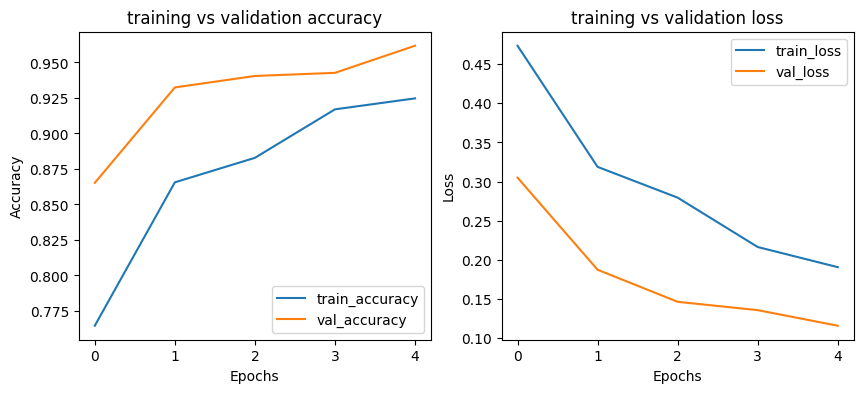

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy')
plt.legend()

# loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('training vs validation loss')
plt.legend()

plt.show()

In [77]:
test_loss, test_accuracy = model.evaluate(val_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 388ms/step - accuracy: 0.9611 - loss: 0.1197
Test Loss: 0.11553981155157089
Test Accuracy: 0.9618068337440491


**5. CREATING CONFUSION MATRICS**
---



---


*   Confusion matrics is drawn to get precision, recall etc..




In [78]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels from the validation generator
y_true = val_generator.classes
class_indices = val_generator.class_indices
class_names = list(class_indices.keys())

# Get predictions from the model on the validation data
# Need to reset the generator before predicting to ensure predictions are in the same order as true labels
val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int) # Convert probabilities to binary predictions

# Calculate and print confusion matrix and classification report
cm=confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step
Confusion Matrix:
[[159 123]
 [132 129]]

Classification Report:
              precision    recall  f1-score   support

      humans       0.55      0.56      0.55       282
  non-humans       0.51      0.49      0.50       261

    accuracy                           0.53       543
   macro avg       0.53      0.53      0.53       543
weighted avg       0.53      0.53      0.53       543



**6. ROC (RECEIVER OPERATING CHARECTERISTICS) CURVE IS PLOTTED**
---



---



*   Measure classification performance at different thresholds



17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step


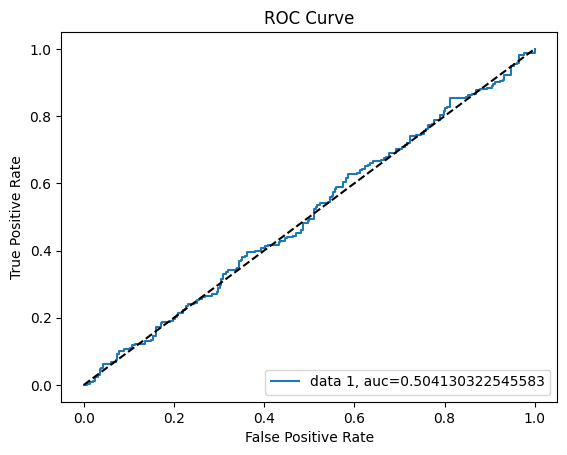

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, auc
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_proba=model.predict(val_generator)
fpr,tpr,_=roc_curve(y_true,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

**7. PREDITING NEW IMAGE**
---



---


*   Unseen data is used to evaluate the model




In [84]:
from tensorflow.keras.preprocessing import image
import numpy as np

# upload an image from your laptop
from google.colab import files
uploaded = files.upload()

# assuming only one file uploaded
for fname in uploaded.keys():
    img_path = fname

# load and preprocess image
img=image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction=model.predict(img_array)

if prediction[0][0]<0.5:
  print("prediction: human")
else:
  print("prediction: non human")

Saving Aldo_Paredes_0002.jpg to Aldo_Paredes_0002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
prediction: human
